**Predicting Academic success**

•	This is a dataset providing information of students enrolled in various undergraduate degrees offered at a higher education institution.

•	Dataset contains demographic information, social-economic factors and academic performance information for each student, that can be used to determine his/her academic outcome: **Graduate, Dropout and Enrolled.**

# **AIM**: 
1. **TO EXPLORE THE PREDICTORS OF ACADEMIC PERFORMANCE AND DETERMINE THEIR RELATIONSHIP W.R.T ACADEMIC OUTCOME (GRADUATE/DROPOUT/ENROLLED)**

2. **PREDICT ACADEMIC OUTCOME WITH HELP OF PREDICTIVE MODELLING TECHNIQUES.**

We've designed our analyses in a stepwise manner as follows: 

▶ Importing necessary libraries

▶ Data preprocessing & Exploration:
1. Acquiring the dataset
2. exploring the data shape & data types
3. data manipulation (checking null values, assigning numeric classes to categorical variable)
4. Exploratory Data Analysis (Descriptive statistics summary, Correlation between 'target' & 'predictors', feature selection based on correlation coefficient, Data visualization)
5. Extracting features & target

▶ Modelling:
1. splitting dataset into train & test in 80:20  
2. Applying various models on train data & testing its accuracy in predicting Outcome of test data.
3. Model selection based on accuracy score. 

▶ Business inference

# Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data pre-processing & Exploration

**Acquiring the dataset**

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Data science project/GraduateDropout.xlsx")
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Grade_2nd_sem,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
df.shape

(4424, 35)

There're 4424 observations with 35 distinct variables.

**Exploring data types**

In [ ]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship_Holder                                  int64
Age at enrollm

1. Out of 35 variables, 34 are independent and 1 is dependent variable. 
2."Target" is the dependent variable. 
3. All the other variables are numeric (int64/float64) except the Target (non-numeric, object dtype).
**Therefore, we need to convert it to numeric dtype in order to give it an equal footing & carry on with our predictive modeling & analysis.**

In [ ]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

There're 3 unique classes in the "Target" column: "Dropout", "Graduate", "Enrolled". 
For our ease of analysis, let us assign numeric class to each of these:

**"Dropout": 0**

**"Enrolled": 1**

**"Graduate": 2**

In [ ]:
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [ ]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Grade_2nd_sem,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


**checking for null values**

In [ ]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship_Holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

There're no null values in any of the columns.

#**EXPLORATORY DATA ANALYSIS:**

**DESCRIPTIVE STATISTICS**

In [ ]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Grade_2nd_sem,Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,6.886980,1.727848,9.899186,0.890823,2.531420,1.254521,12.322107,16.455244,7.317812,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,1.178119
std,0.605747,5.298964,1.313793,4.331792,0.311897,3.963707,1.748447,9.026251,11.044800,3.997828,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.888243
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000
25%,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,1.000000,2.000000,3.000000,5.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000
50%,1.000000,8.000000,1.000000,10.000000,1.000000,1.000000,1.000000,13.000000,14.000000,6.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000
75%,1.000000,12.000000,2.000000,13.000000,1.000000,1.000000,1.000000,22.000000,27.000000,10.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,2.000000
max,6.000000,18.000000,9.000000,17.000000,1.000000,17.000000,21.000000,29.000000,34.000000,32.000000,...,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,2.000000


**Degree of Association between predictors & target variable (i.e., Correlation):**

In [ ]:
df.corr()['Target']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship_Holder                                0.2975

Based on the correlation score between Predictor & Target variables, we'll select only those that've a strong correlation (positive or Negetive): 

In [ ]:
df1 = df.iloc[:,[1,11,13,14,15,16,17,20,22,23,26,28,29,34]]
df1.head() #revised dataframe after feature selection

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship_Holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular_units_1stsem(approved),Grade_1st_sem,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Grade_2nd_sem,Target
0,8,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000,0
1,6,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667,2
2,1,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000,0
3,8,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000,2
4,12,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000,2


<Axes: >

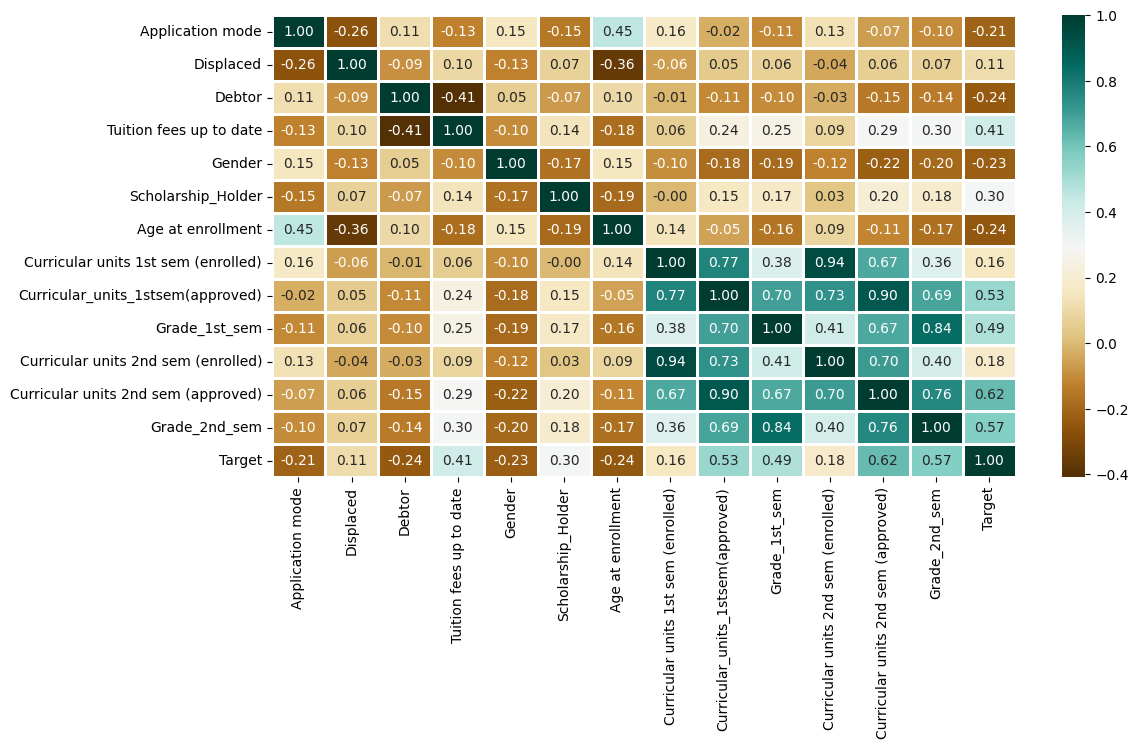

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df1.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


In [ ]:
# How many dropouts, enrolled & graduates are there in Target column
df1['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

# Data visualization:

1. we've 2209 graduates, 1421 dropouts, 794 enrolled. Let us visualize this via **barplot**

In [ ]:
def addlabels(x,y):
  for i in range(len(x)):
    plt.text(i,y[i],y[i],ha='center')

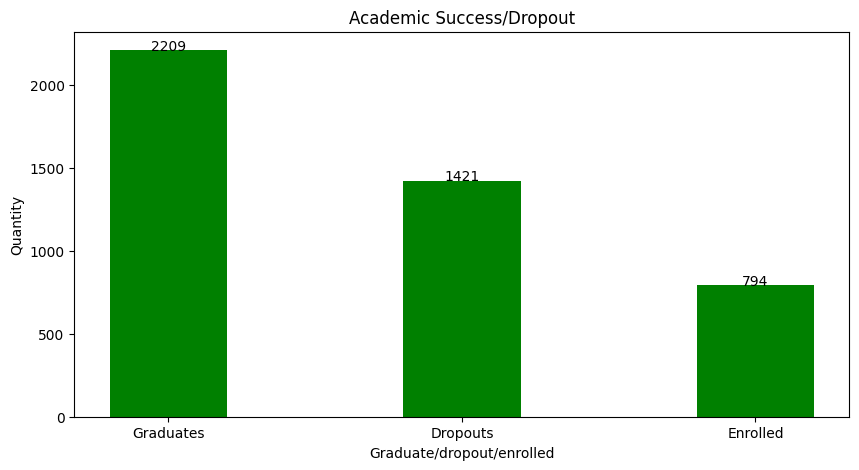

In [ ]:
data={'Graduates':2209,'Dropouts':1421,'Enrolled':794}
x = list(data.keys())
y = list(data.values())
fig = plt.figure(figsize=(10,5))
#creating bar plot
plt.bar(x,y,width=0.4,color='green')
plt.xlabel("Graduate/dropout/enrolled")
plt.ylabel("Quantity")
addlabels(x,y)
plt.title("Academic Success/Dropout")
plt.show()

2. suppose we want to understand whether Target(Graduate=2, dropout=0, enrolled=1) varies as per curricular units (i.e., grades) awarded. 

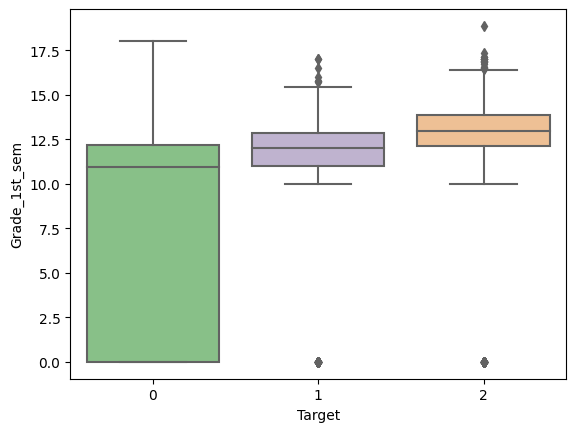

In [ ]:
sns.boxplot(x='Target', y='Grade_1st_sem', data=df1, palette='Accent')
plt.show()

There're outliers for graduates and enrolled; implying both graduates & enrolled students seems to outperform (i.e., score higher grades) the upper quartile (75th percentile) marks; Also there is a single observation for graduates who has underperformed.
1. Graduates as well as enrolled bears a minimum curricular grade of 10.0 units.
2. Dropouts minimum curricular grade is 0 units. 

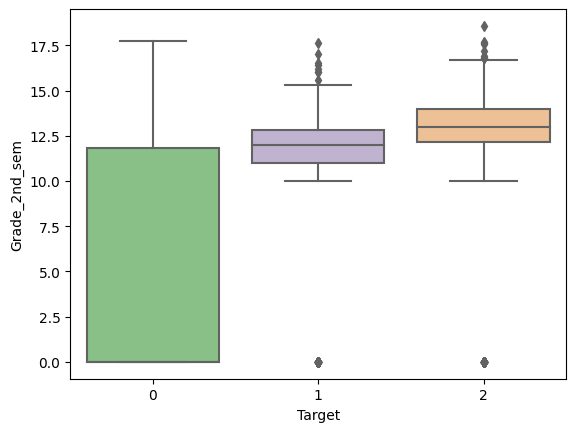

In [ ]:
sns.boxplot(x='Target', y='Grade_2nd_sem', data=df1, palette='Accent')
plt.show()

3. Cross tabulation to understand Target (enrolled/graduates/dropouts) are debtors or not (0=no,1=yes)

In [ ]:


pd.crosstab(df.Target,df.Debtor,margins=True,margins_name='Total')

Debtor,0,1,Total
Target,,,
0,1109,312,1421
1,704,90,794
2,2108,101,2209
Total,3921,503,4424


4. #Cross Tablulation to check  graduates/dropouts/enrolled as per gender (Male=1,Female=0)

In [ ]:

pd.crosstab(df.Target,df.Gender,margins=True,margins_name='Total')

Gender,0,1,Total
Target,,,
0,720,701,1421
1,487,307,794
2,1661,548,2209
Total,2868,1556,4424


1. **Graduates**: Total=2209, Male=548(24.8%), Female=1661(75.2%)

2. **Dropouts**: Total=1421, Male=701(49.3%), Female=720(50.7%)

3. **Enrolled**: Total=794, Male=307(38.6%), Female=487(61.4%)

4. Out of the total observations(4424): **Male=1556(35.17%)**; **Female=2868(64.83%)**

5. Cross tabulation to understand which graduates/dropouts/enrolled are scholarship holders (yes=1,no=0)

In [ ]:
pd.crosstab(df.Target,df.Scholarship_Holder,margins=True,margins_name='Total')

Scholarship_Holder,0,1,Total
Target,,,
0,1287,134,1421
1,664,130,794
2,1374,835,2209
Total,3325,1099,4424


24.8% students are scholarship holders--76% among them are present day Graduates, 12.1% of previously scholarship holders are present day Dropouts, remaining 11.8% are enrolled.


6. Let us check the gender status of scholarship holders:

In [ ]:
pd.crosstab(df.Gender,df.Scholarship_Holder,margins=True,margins_name='Total')

Scholarship_Holder,0,1,Total
Gender,,,
0,2001,867,2868
1,1324,232,1556
Total,3325,1099,4424




Out of 1099 scholarship holders: 
1. Females=867(78.9%)
2. Males=232(21.1%)




7. Exploring relation between "Curricular units 1st sem (grade)" & "Curricular units 2nd sem (grade)"

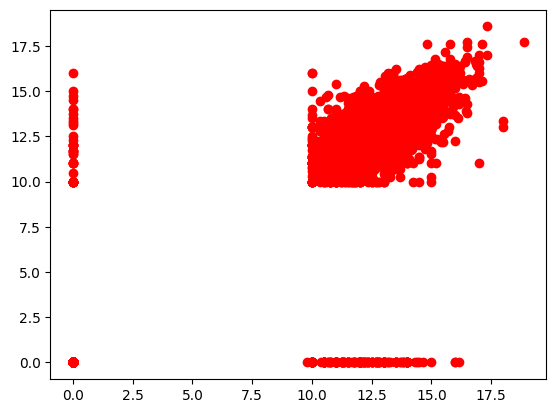

In [ ]:

a=df.Grade_1st_sem
b=df.Grade_2nd_sem
plt.scatter(a,b,c="red")
plt.show()

Relation between "Curricular units 1st sem (grade)" & "Curricular units 2nd sem (grade)" cant be deduced. There's no pattern noticed. We can assume, there is no relation between these 2 variables. 

#**Seperating "features" from "target"**

In [ ]:
#Extracting the set of features
X=df1.drop(['Target'], axis=1)
X

,Application mode,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship_Holder,Age at enrollment,Curricular units 1st sem (enrolled),Curricular_units_1stsem(approved),Grade_1st_sem,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (approved),Grade_2nd_sem
0,8,1,0,1,1,0,20,0,0,0.000000,0,0,0.000000
1,6,1,0,0,1,0,19,6,6,14.000000,6,6,13.666667
2,1,1,0,0,1,0,19,6,0,0.000000,6,0,0.000000
3,8,1,0,1,0,0,20,6,6,13.428571,6,5,12.400000
4,12,0,0,1,0,0,45,6,5,12.333333,6,6,13.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,0,0,1,1,0,19,6,5,13.600000,6,5,12.666667
4420,1,1,1,0,0,0,18,6,6,12.000000,6,2,11.000000
4421,1,1,0,1,0,1,30,7,7,14.912500,8,1,13.500000
4422,1,1,0,1,0,1,20,5,5,13.800000,5,5,12.000000


In [ ]:
#Extracting the outcome 'Target' from the dataset
Y=df1.Target[:]
Y

**SPLITTING THE DATASET**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# MODELLING THE TRAIN DATASET

**RANDOM FOREST CLASSIFIER:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(Y_test, y_pred)))
conf_m = confusion_matrix(Y_test, y_pred)
print(conf_m)

**SUPPORT VECTOR CLASSIFIER**

In [ ]:
svc_model=SVC(C=.1,kernel='linear',gamma=1)
svc_model.fit(X_train,Y_train)
prediction=svc_model.predict(X_test)

In [ ]:
print(svc_model.score(X_test,Y_test))

In [ ]:
print("Confusion Matrix:")
confusion_matrix(prediction,Y_test)

**NAIVE BAYES' CLASSIFIER**

In [ ]:
classifier=GaussianNB()
classifier.fit(X_train,Y_train)

In [ ]:
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)
print("Accuracy",accuracy_score(Y_test,y_pred))


**K-NEAREST NEIGHBORS:**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)

KNN.fit(X_train,Y_train)
y_pred = KNN.predict(X_test)
print("Accuracy: ",accuracy_score(Y_test,y_pred))


# Based on the model accuracies; we select the one with highest accuracy: **Support vector classifier (75.9%)**

Thus, support vector classifier is ~76% accurate in predicting student's academic performance. 

# Business Inference:
INSIGHTS: 
1. The factors impacting a student's academic outcome(i.e., Graduate/Enrolled/Dropout) are: 
**DEMOGRAPHIC FACTORS**: Displaced, Gender, Age at enrolment

**ACADEMIC FACTORS**: application mode, Scholarship holder, Curricular units at 1st sem(enrolled), Curricular units at 1st sem(approved), Grade obtained in 1st sem, Curricular units at 2nd sem(enrolled), Curricular units at 2nd sem(approved), Grade obtained in 2nd sem

**SOCIO-ECONOMIC FACTORS**: Debtor, Tuition fees up to date

2. **Strong & Direct relationship were pointed between target & these predictors** : Tuition fees up to date(+40.98%), Curricular units at 1st sem(approved)(+52.9%), Grade 1st sem(+48.5%), Curricular units at 2nd sem(approved)(+62.4%), Grade 2nd sem(+56.68%)

INFERENCE:

✅ Academic factors are the highest impacting ones when it come to ones' success (graduate or dropout or enrolled) followed by Demographic and Socio-economic conditions. 

 ✅ As  performance of Academic factors increases so does Academic Outcome(i.e., Graduate/Enrolled/Dropout)

**VERDICT**: To improve academic outcome; one should whole-heartedly focus on improving his/her academic performance throughout the semester. 
However, socio-economics do bear an emphasis; it is not as potent as academic indicators.